In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import os
import gym
import neat
from evaluator import Evaluator
from datetime import datetime
from tf_neat.recurrent_net import RecurrentNet

param = {
    "g_s":3,
    "s_s":2,
    "max_state":5,
    "react_depth":1,
    "neuron_num":5,
    "input_num":4,
    "output_num":1
}

s = datetime.now().strftime('%Y-%m-%d-%Hh-%Mm-%Ss')
rootPath = f"generations\{s}"

if not os.path.exists(rootPath):
    os.makedirs(rootPath)
    
pop=""

def make_env():
    return gym.make("CartPole-v0")


def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

def run(n_generations):
    global pop
    config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )

    evaluator = Evaluator(
        make_net, make_env=make_env, param=param
    )

    def eval_genomes(genomes, config):
        for idx, genome in genomes:
            print(genome)
            genome.fitness = evaluator.eval_genome(genome, config, idx, rootPath = rootPath)

    pop = neat.Population(config)
    pop.run(eval_genomes, n_generations)

run(10)

<>:19: DeprecationWarning: invalid escape sequence \{
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:176: DeprecationWarning: Using default False for 'no_fitness_termination'
  DeprecationWarning)
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:57: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  DeprecationWarning)
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:57: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  DeprecationWarning)
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:57: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  DeprecationWarning)
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:57: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  DeprecationWarning)
C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\neat\config.py:57:

Key: 1
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.0156268322431528, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.2394994084016063, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.07021849702936506, response=1.0, activation=sigmoid, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=-0.33521487396382094, response=1.0, activation=sigmoid, aggregation=sum)
	4 DefaultNodeGene(key=4, bias=1.3159273631543795, response=1.0, activation=sigmoid, aggregation=sum)
	5 DefaultNodeGene(key=5, bias=-1.0021205563531985, response=1.0, activation=sigmoid, aggregation=sum)
	6 DefaultNodeGene(key=6, bias=-1.0610652033196077, response=1.0, activation=sigmoid, aggregation=sum)
	7 DefaultNodeGene(key=7, bias=1.047290020175031, response=1.0, activation=sigmoid, aggregation=sum)
	8 DefaultNodeGene(key=8, bias=-0.7414016923065552, response=1.0, activation=sigmoid, aggregation=sum)
	9 DefaultNodeGene(key=9, bias=0.7907073808629

Key: 2
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.713403033988682, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.9688211762097882, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=0.44093381248023167, response=1.0, activation=sigmoid, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=0.6962156627201458, response=1.0, activation=sigmoid, aggregation=sum)
	4 DefaultNodeGene(key=4, bias=-0.5272279969928005, response=1.0, activation=sigmoid, aggregation=sum)
	5 DefaultNodeGene(key=5, bias=0.24647990786591414, response=1.0, activation=sigmoid, aggregation=sum)
	6 DefaultNodeGene(key=6, bias=0.5442352918113688, response=1.0, activation=sigmoid, aggregation=sum)
	7 DefaultNodeGene(key=7, bias=0.07923411928899297, response=1.0, activation=sigmoid, aggregation=sum)
	8 DefaultNodeGene(key=8, bias=0.5133244287324219, response=1.0, activation=sigmoid, aggregation=sum)
	9 DefaultNodeGene(key=9, bias=1.4270949381041313

SystemExit: 

C:\Users\arizona\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


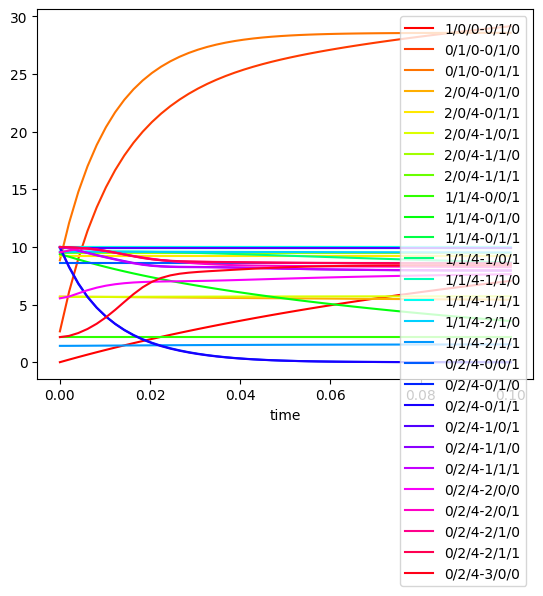

In [4]:
%load_ext autoreload
%autoreload 2
import os
import neat
import pickle
import numpy as np
from gene import Gene
from simulator import Simulator
from tf_neat.recurrent_net import RecurrentNet
np.set_printoptions(precision=6, suppress=True)

def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

param = {
    "g_c": 2,
    "g_s": 3,
    "max_state": 5,
    "react_depth": 2,
    "neuron_num": 6,
    "input_num": 4,
    "output_num": 1
}

config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

filepath = f"test_case"
case_num = 1
genome = ""
with open(f"{filepath}\\{case_num}\\genome.JSON", 'rb') as fr:
    genome = pickle.load(fr)

net = make_net(genome, config, 1)
gene = Gene(net, param)
gene.expression()
model = gene.model
simulator = Simulator(model)
simulator.run(0.1)
simulator.visualize()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


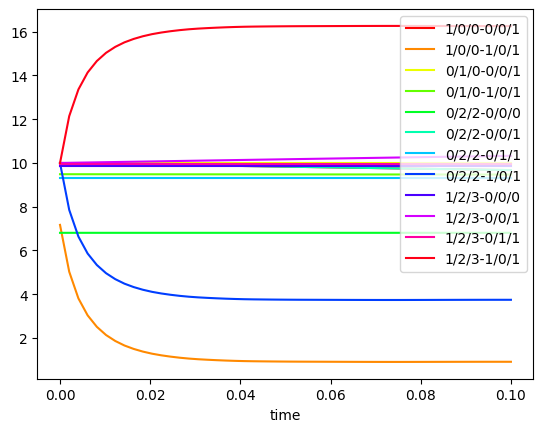

In [62]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
import os
import neat
import pickle
import numpy as np
from gene import Gene
from simulator import Simulator
from tf_neat.recurrent_net import RecurrentNet
#np.set_printoptions(precision=6, suppress=True)

def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

param = {
    "g_c": 2,
    "g_s": 3,
    "max_state": 5,
    "react_depth": 2,
    "neuron_num": 6,
    "input_num": 4,
    "output_num": 1
}

config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

filepath = f"test_case"

genome = ""
with open(f"{filepath}\genome.JSON", 'rb') as fr:
    genome = pickle.load(fr)

net = make_net(genome, config, 1)
gene = Gene(net, param)
gene.expression()
model = gene.model
simulator = Simulator(model)
simulator.run(0.1)
simulator.visualize()

In [40]:
simulator.system.product

array([ 5,  7,  9, 11], dtype=int64)

In [16]:
simulator.system.reactant2

array([2, 3, 5, 7], dtype=int64)

In [11]:
modeld = gene.model

In [12]:
modeld["M_"]

,r1-0/0/1,r1-1/0/1,r2-0/0/1,r2-1/0/1,d-0/2/2-0/0/0-0/1/1,d-1/2/3-0/0/0-0/1/1
1/0/0-0/0/1,0,0,1,0,0,0
1/0/0-1/0/1,0,0,0,1,0,0
0/1/0-0/0/1,2,0,0,0,0,0
0/1/0-1/0/1,0,2,0,0,0,0
0/2/2-0/0/0,0,0,0,0,-1,0
0/2/2-0/0/1,-1,0,1,0,0,0
0/2/2-0/1/1,0,0,0,0,1,0
0/2/2-1/0/1,0,-1,0,1,0,0
1/2/3-0/0/0,0,0,0,0,0,-1
1/2/3-0/0/1,0,0,-1,0,0,0


In [34]:
np.exp(-modeld["a"])

,0
1/0/0-0/0/1,0.019184
1/0/0-1/0/1,0.810902
0/1/0-0/0/1,0.019226
0/1/0-1/0/1,0.810997
0/2/2-0/0/0,0.231738
0/2/2-0/0/1,0.019191
0/2/2-0/1/1,0.995665
0/2/2-1/0/1,0.810918
1/2/3-0/0/0,0.231702
1/2/3-0/0/1,0.019183


In [87]:
M_ = modeld["M_"].to_numpy()

In [29]:
 def relu(x) :
    return np.maximum(0,x)
relu(M_[:,:4]).argmax(axis=0)

array([2, 3, 0, 1], dtype=int64)

In [49]:
np.where(relu(M_[:,:4])>0,1,0)

array([2, 3, 0, 1], dtype=int64)

In [53]:
np.where(relu(M_[:,:4])>0,modeld["x_0"],0)

array([[0.        , 0.        , 9.99992535, 0.        ],
       [0.        , 0.        , 0.        , 7.17020834],
       [9.99998803, 0.        , 0.        , 0.        ],
       [0.        , 9.48523999, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 9.99999994, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 9.99539647],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [88]:
M_r = relu(M_[:,:4])

In [89]:
M_r.shape

(12, 4)

In [90]:
reactant = np.zeros(M_r.shape)
reactant[np.arange(M_r.shape[1]), np.argmax(M_r, axis=0)] =1

In [95]:
reactant.argmax(axis=0)

array([2, 3, 0, 1], dtype=int64)

In [98]:
np.apply_along_axis(lambda x: x[reactant.argmax(axis=0)], 0, modeld["x_0"])

array([[9.99998803],
       [9.48523999],
       [9.99992535],
       [7.17020834]])

In [99]:
M_r

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [96]:
(M_r - reactant).argmax( axis=0)

array([2, 3, 5, 7], dtype=int64)

In [76]:
np.arange(M_r.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [63]:
re = np.ones(4)

In [61]:
np.apply_along_axis(lambda x: x, 1, relu(M_[:,:4]))

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [34]:
relu(M_[:,:4])

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [16]:
modeld["x_0"]

,0
1/0/0-0/0/1,9.999925
1/0/0-1/0/1,7.170208
0/1/0-0/0/1,9.999988
0/1/0-1/0/1,9.485240
0/2/2-0/0/0,6.807034
0/2/2-0/0/1,10.000000
0/2/2-0/1/1,9.329741
0/2/2-1/0/1,9.995396
1/2/3-0/0/0,9.853304
1/2/3-0/0/1,10.000000


In [18]:
np.exp(modeld["a"])

,0
1/0/0-0/0/1,52.127796
1/0/0-1/0/1,1.233195
0/1/0-0/0/1,52.012958
0/1/0-1/0/1,1.233051
0/2/2-0/0/0,4.315214
0/2/2-0/0/1,52.108443
0/2/2-0/1/1,1.004354
0/2/2-1/0/1,1.233171
1/2/3-0/0/0,4.315889
1/2/3-0/0/1,52.130482


In [7]:
simulator = Simulator.by_file(filepath)
simulator.model_dict["M_"]

,r1-0/0/1,r1-1/0/1,r2-0/0/1,r2-1/0/1,d-0/2/2-0/0/0-0/1/1,d-1/2/3-0/0/0-0/1/1
1/0/0-0/0/1,0,0,1,0,0,0
1/0/0-1/0/1,0,0,0,1,0,0
0/1/0-0/0/1,2,0,0,0,0,0
0/1/0-1/0/1,0,2,0,0,0,0
0/2/2-0/0/0,0,0,0,0,-1,0
0/2/2-0/0/1,-1,0,1,0,0,0
0/2/2-0/1/1,0,0,0,0,1,0
0/2/2-1/0/1,0,-1,0,1,0,0
1/2/3-0/0/0,0,0,0,0,0,-1
1/2/3-0/0/1,0,0,-1,0,0,0


In [105]:
simulator.model_dict["S"]

,0/0,0/1,1/0,1/1,2/0,2/1,3/0,3/1,4/0,4/1
1/0/0-0/0,1,0,0,0,0,0,0,0,0,0
1/0/0-0/1,0,1,0,0,0,0,0,0,0,0
1/0/0-1/0,0,0,1,0,0,0,0,0,0,0
1/0/0-1/1,0,0,0,1,0,0,0,0,0,0
1/0/0-2/0,0,0,0,0,1,0,0,0,0,0
1/0/0-2/1,0,0,0,0,0,1,0,0,0,0
1/0/0-3/0,0,0,0,0,0,0,1,0,0,0
1/0/0-3/1,0,0,0,0,0,0,0,1,0,0
1/0/0-4/0,0,0,0,0,0,0,0,0,1,0
1/0/0-4/1,0,0,0,0,0,0,0,0,0,1


In [93]:
simulator.model["S"]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:116: RuntimeWarning: invalid value encountered in log
  np.dot(self.x.T, self.V) + \
C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:124: RuntimeWarning: invalid value encountered in log
  (np.exp(0.5 * np.dot(np.log(self.x.T), np.abs(self.M_))))).T)
C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:127: RuntimeWarning: invalid value encountered in log
  (np.exp(np.dot(np.abs(self.M_.T), np.log(self.x)))))
C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:130: RuntimeWarning: invalid value encountered in log
  (np.exp(np.dot(np.abs(self.M_.T), np.log(self.x)))))


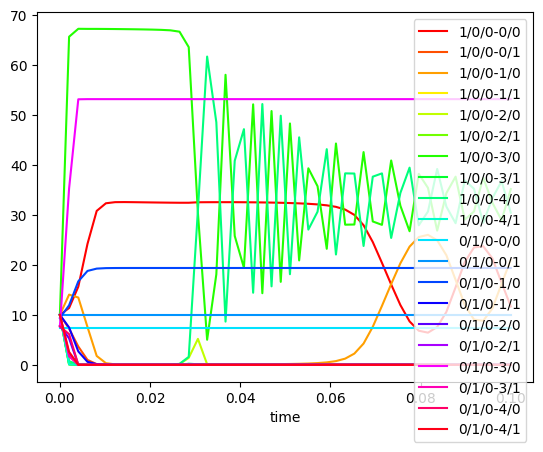

In [84]:
#simulator = Simulator.by_file(filepath)
simulator.run(0.1)
simulator.visualize()

In [45]:
simulator.model

{'x_0': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 'p_0': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 'M': array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]], dtype=int64),
 'M_': array([[-1, -1, -1, ...,  0,  0,  0

In [16]:
import numpy as np
from simulator import Simulator
np.set_printoptions(precision=6, suppress=True)
time = "2022-04-28-08h-34m-27s"
gen_idx =1
idx = 74
filepath = f"generations\\{time}\\gen_{gen_idx}\\{idx}"

simulator = Simulator.by_file(filepath)


#simulator.run(0.1)
#simulator.visualize(savePath=savePath)


FileNotFoundError: [Errno 2] No such file or directory: 'generations\\2022-04-28-08h-34m-27s\\gen_1\\74\\model.JSON'

In [10]:
simulator.run(0.7)

NameError: name 'simulator' is not defined

In [1]:
## np.dot(self.x.T, self.V) +\
## np.dot(self.q, np.dot(1 / (self.D + 1) - 1, self.q.T))

q = np.dot(np.diag(np.dot(simulator.model['M'], simulator.model['q_c']).T[0]), simulator.model['S'])
V = np.dot(q, np.dot(1/(simulator.model['D']+1)-1 ,q.T))

np.dot(q.T, simulator.model['M_'])[0].shape

#np.dot(simulator.model['M'].T, simulator.model['M_'])


NameError: name 'np' is not defined

In [6]:
simulator.model["x"]

KeyError: 'x'

In [24]:
simulator.system.M_[7]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [25]:
np.exp(np.dot(np.abs(simulator.system.M_).T, np.log(simulator.system.x)))

array([[271.658793],
       [270.350938],
       [272.436097],
       [306.093292],
       [271.917251],
       [274.014491],
       [272.695294],
       [296.525334],
       [265.418915],
       [267.466035],
       [266.178365],
       [298.01728 ],
       [267.720503],
       [301.506386],
       [269.321685],
       [271.398906],
       [270.092302],
       [303.023393],
       [271.657117],
       [293.551396],
       [265.164998],
       [ 10.657005],
       [  1.60151 ],
       [  1.613862],
       [  1.606093],
       [ 10.710625],
       [  1.615398],
       [ 10.375829],
       [  1.576793],
       [ 10.550123],
       [  1.599978],
       [ 12.461034],
       [  1.700895],
       [  1.714013],
       [  1.705761],
       [ 12.523731],
       [  1.715644],
       [ 12.13226 ],
       [  1.674643],
       [ 12.336059],
       [  1.699267],
       [  0.436029],
       [  0.010105],
       [  0.85988 ],
       [  0.4793  ],
       [  0.482997],
       [  0.480672],
       [  0.8

In [21]:
simulator.model_dict["M_"]

,h-1/1/4-0/0-0/1,h-1/1/4-0/0-1/0,h-1/1/4-0/1-1/0,h-1/0/0-0/0-1/1,h-1/1/4-0/0-1/1,h-1/1/4-0/1-1/1,h-1/1/4-1/0-1/1,h-1/0/0-0/0-2/0,h-1/1/4-0/0-2/0,h-1/1/4-0/1-2/0,...,h-1/0/0-2/0-4/1,h-1/1/4-2/0-4/1,h-1/0/0-2/1-4/1,h-1/1/4-2/1-4/1,h-1/0/0-3/0-4/1,h-1/1/4-3/0-4/1,h-1/0/0-3/1-4/1,h-1/1/4-3/1-4/1,h-1/0/0-4/0-4/1,h-1/1/4-4/0-4/1
1/0/0-0/0,0,0,0,-1,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
1/0/0-1/1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/0/0-2/0,0,0,0,0,0,0,0,1,0,0,...,-1,0,0,0,0,0,0,0,0,0
1/0/0-2/1,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
1/0/0-3/0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
1/0/0-3/1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
1/0/0-4/0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
1/0/0-4/1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1/1/4-0/0,-1,-1,0,0,-1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
1/1/4-0/1,1,0,-1,0,0,-1,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


x : [[17.408165]
 [17.496451]
 [16.926963]
 [17.218414]
 [ 0.855799]
 [ 0.930701]
 [ 0.063314]
 [ 0.      ]
 [16.623669]
 [16.551742]
 [16.588428]
 [16.598002]
 [15.943737]
 [16.233426]
 [ 0.114293]
 [ 0.125681]
 [ 0.020218]
 [ 0.019772]
 [ 3.453   ]]
grad_p : [[ 0.141733  0.069716  0.116285  0.08527  -0.209359 -0.282201  0.067588
  -0.        0.27557   0.3109    0.29082   0.309949  0.263625  0.299825
  -0.194679 -0.21649  -0.025841 -0.024886  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.03533   0.015249 -0.02008  -0.072017  0.034379 -0.000951  0.019129
  -0.025448 -0.011945 -0.047275 -0.027195  0.046569 -0.046324 -0.056463
   0.024255 -0.011075  0.009006  0.015554 -0.010124 -0.031015  0.0362
  -0.351091 -0.470249 -0.505578 -0.485498 -0.279074 -0.504627 -0.325643
  -0.458303 -0.294628 -0.494504 -0.423934 -0.49206  -0.52739  -0.50731
  -0.351917 -0.526439 -0.398486 -0.480115 -0.367471 -0.516315 -0.072843
  -0.021812 -0.074145 -0.301412 -0.336741 -0.316661 -0.002128 -0.33579
  -0.048696 -0.

x : [[17.408141]
 [17.496444]
 [16.926937]
 [17.2184  ]
 [ 0.855909]
 [ 0.930801]
 [ 0.063262]
 [ 0.      ]
 [16.623647]
 [16.551766]
 [16.588426]
 [16.598025]
 [15.943698]
 [16.233434]
 [ 0.114298]
 [ 0.125688]
 [ 0.020216]
 [ 0.01977 ]
 [ 3.453   ]]
grad_p : [[ 0.141801  0.069785  0.116358  0.085342 -0.209456 -0.282311  0.067556
  -0.        0.275506  0.310882  0.290775  0.309923  0.263682  0.299859
  -0.194684 -0.216498 -0.025839 -0.024884  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.035376  0.015268 -0.020108 -0.072016  0.034417 -0.000959  0.019148
  -0.025442 -0.011824 -0.047201 -0.027093  0.046573 -0.046241 -0.056459
   0.024353 -0.011023  0.009085  0.015557 -0.010064 -0.031016  0.036177
  -0.351256 -0.47019  -0.505566 -0.485458 -0.279241 -0.504607 -0.325814
  -0.458366 -0.294798 -0.494543 -0.424112 -0.492004 -0.52738  -0.507272
  -0.352097 -0.52642  -0.39867  -0.480179 -0.367654 -0.516357 -0.072856
  -0.021814 -0.074245 -0.301346 -0.336722 -0.316614 -0.002229 -0.335762
  -0.048802

x : [[17.408138]
 [17.496444]
 [16.926934]
 [17.218398]
 [ 0.855922]
 [ 0.930813]
 [ 0.063256]
 [ 0.      ]
 [16.623644]
 [16.551768]
 [16.588426]
 [16.598028]
 [15.943693]
 [16.233435]
 [ 0.114299]
 [ 0.125689]
 [ 0.020215]
 [ 0.01977 ]
 [ 3.453   ]]
grad_p : [[ 0.141778  0.069762  0.116337  0.08532  -0.209469 -0.282326  0.067552
  -0.        0.275499  0.31088   0.290769  0.30992   0.263688  0.299863
  -0.194684 -0.216498 -0.025839 -0.024884  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.035382  0.015271 -0.020111 -0.072016  0.034421 -0.00096   0.01915
  -0.025441 -0.01181  -0.047192 -0.027081  0.046575 -0.046231 -0.056458
   0.024365 -0.011017  0.009094  0.015558 -0.010057 -0.031017  0.036175
  -0.351246 -0.470183 -0.505565 -0.485454 -0.279231 -0.504604 -0.325805
  -0.458373 -0.294789 -0.494548 -0.424104 -0.491997 -0.527379 -0.507268
  -0.352088 -0.526418 -0.398663 -0.480187 -0.367646 -0.516362 -0.072858
  -0.021814 -0.074226 -0.301338 -0.336719 -0.316609 -0.00221  -0.335759
  -0.048785 

x : [[17.408133]
 [17.496442]
 [16.926928]
 [17.218395]
 [ 0.855946]
 [ 0.930836]
 [ 0.063244]
 [ 0.      ]
 [16.62364 ]
 [16.551774]
 [16.588425]
 [16.598033]
 [15.943684]
 [16.233437]
 [ 0.1143  ]
 [ 0.12569 ]
 [ 0.020215]
 [ 0.019769]
 [ 3.453   ]]
grad_p : [[ 0.141497  0.06948   0.116064  0.085043 -0.209507 -0.282369  0.067544
  -0.        0.275484  0.310876  0.290759  0.309914  0.263701  0.299871
  -0.194686 -0.2165   -0.025839 -0.024883  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.035392  0.015275 -0.020117 -0.072017  0.03443  -0.000962  0.019155
  -0.025432 -0.011783 -0.047175 -0.027058  0.046585 -0.046213 -0.056454
   0.024387 -0.011005  0.009112  0.015563 -0.010043 -0.031022  0.03617
  -0.351004 -0.47017  -0.505562 -0.485445 -0.278987 -0.5046   -0.325572
  -0.458387 -0.29455  -0.494557 -0.423866 -0.491984 -0.527376 -0.507259
  -0.351849 -0.526414 -0.398434 -0.480201 -0.367412 -0.516371 -0.072862
  -0.021814 -0.073953 -0.301323 -0.336715 -0.316598 -0.001936 -0.335753
  -0.048521 

x : [[17.408132]
 [17.496442]
 [16.926927]
 [17.218394]
 [ 0.85595 ]
 [ 0.930839]
 [ 0.063242]
 [ 0.      ]
 [16.623639]
 [16.551775]
 [16.588425]
 [16.598034]
 [15.943683]
 [16.233437]
 [ 0.1143  ]
 [ 0.125691]
 [ 0.020215]
 [ 0.019769]
 [ 3.453   ]]
grad_p : [[ 0.141669  0.069653  0.116233  0.085213 -0.209501 -0.282363  0.067543
  -0.        0.275482  0.310876  0.290758  0.309913  0.263703  0.299872
  -0.194686 -0.2165   -0.025839 -0.024883  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.035394  0.015276 -0.020118 -0.072016  0.034431 -0.000963  0.019155
  -0.025436 -0.011779 -0.047172 -0.027054  0.046579 -0.04621  -0.056455
   0.02439  -0.011004  0.009114  0.01556  -0.010041 -0.031019  0.036169
  -0.35117  -0.470168 -0.505561 -0.485443 -0.279154 -0.504599 -0.325734
  -0.458389 -0.294715 -0.494558 -0.424032 -0.491982 -0.527376 -0.507258
  -0.352016 -0.526413 -0.398595 -0.480204 -0.367576 -0.516372 -0.072862
  -0.021814 -0.074126 -0.301321 -0.336714 -0.316596 -0.00211  -0.335752
  -0.048689

   0.191617 -0.067544  0.000956]]
hamiltonian_flow_x : [[ 0.46162 ]
 [-0.283456]
 [ 0.171053]
 [-0.13233 ]
 [ 1.828064]
 [ 2.638421]
 [-3.407045]
 [-1.276327]
 [-0.547416]
 [ 0.606613]
 [-0.049381]
 [ 0.580166]
 [-0.990493]
 [ 0.212681]
 [ 0.128285]
 [ 0.170304]
 [-0.056128]
 [-0.05463 ]
 [ 0.      ]]
x : [[17.408132]
 [17.496442]
 [16.926927]
 [17.218394]
 [ 0.855951]
 [ 0.930839]
 [ 0.063242]
 [ 0.      ]
 [16.623639]
 [16.551775]
 [16.588425]
 [16.598034]
 [15.943683]
 [16.233437]
 [ 0.1143  ]
 [ 0.125691]
 [ 0.020215]
 [ 0.019769]
 [ 3.453   ]]
grad_p : [[ 0.141757  0.069741  0.116318  0.0853   -0.209497 -0.282358  0.067544
  -0.        0.275482  0.310876  0.290758  0.309913  0.263703  0.299872
  -0.194686 -0.2165   -0.025839 -0.024883  0.      ]]
np.dot(grad_p, self.M_) : [[ 0.035394  0.015276 -0.020118 -0.072015  0.034431 -0.000963  0.019155
  -0.025439 -0.011778 -0.047172 -0.027054  0.046577 -0.04621  -0.056456
   0.02439  -0.011003  0.009115  0.015559 -0.010041 -0.031018  0.036

C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:56: RuntimeWarning: invalid value encountered in log
  np.dot(self.x.T, self.V) +\
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:65: RuntimeWarning: invalid value encountered in log
  (np.exp( 0.5*np.dot(np.log(self.x.T), np.abs(self.M_))))).T)
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:68: RuntimeWarning: invalid value encountered in log
  (np.dot(np.abs(self.M_.T), np.log(self.x))))
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:71: RuntimeWarning: invalid value encountered in log
  (np.dot(np.abs(self.M_.T), np.log(self.x))))
C:\Users\arizona95\anaconda3\envs\tensorflow\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


True

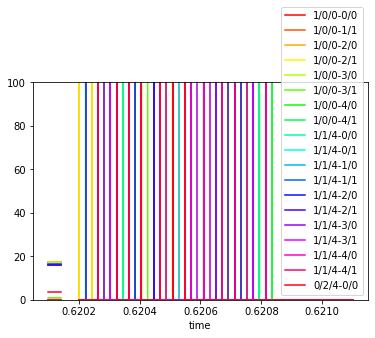

In [4]:
simulator.run(0.001)

In [ ]:
simulator.run(0.62)

C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:56: RuntimeWarning: divide by zero encountered in log
  np.dot(self.x.T, self.V) +\
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:65: RuntimeWarning: divide by zero encountered in log
  (np.exp( 0.5*np.dot(np.log(self.x.T), np.abs(self.M_))))).T)
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:68: RuntimeWarning: divide by zero encountered in log
  (np.dot(np.abs(self.M_.T), np.log(self.x))-1))
C:\Users\arizona95\Desktop\arizona95\git\BEAT\lab\system.py:71: RuntimeWarning: divide by zero encountered in log
  (np.dot(np.abs(self.M_.T), np.log(self.x))-1))
C:\Users\arizona95\anaconda3\envs\tensorflow\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


True

In [13]:
simulator.model

{'x_0': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 'p_0': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 'M': array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 2]], dtype=int64),
 'M_': array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
    

In [ ]:
print(simulator.model['M'].shape)
print(simulator.model['q_c'].shape)
print(simulator.model['S'].shape)
print(q.shape)

In [ ]:
type(simulator.model_dict['M_'])

In [ ]:
np.dot(q.T, simulator.model['M_'])[:,0]

In [ ]:
q.shape

In [ ]:
2.71**813.911757

In [ ]:
simulator.history["xp"][:1]

In [ ]:
from system import System
system = System(simulator.model)

In [ ]:
system.energy()

In [ ]:
np.set_printoptions(precision=6, suppress=True)
system.flow()